In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv('../../data/pokemon.csv')
print(df.shape)
df.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [24]:
print('median\t', df['weight'].median())
print('mode\t', df['weight'].mode().values)
df['weight'].describe()

median	 27.0
mode	 [5.]


count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

Note the mean is much larger than the median, which suggests a right-skewed distribution.

### Example 1 - Scale the x-axis to log-type

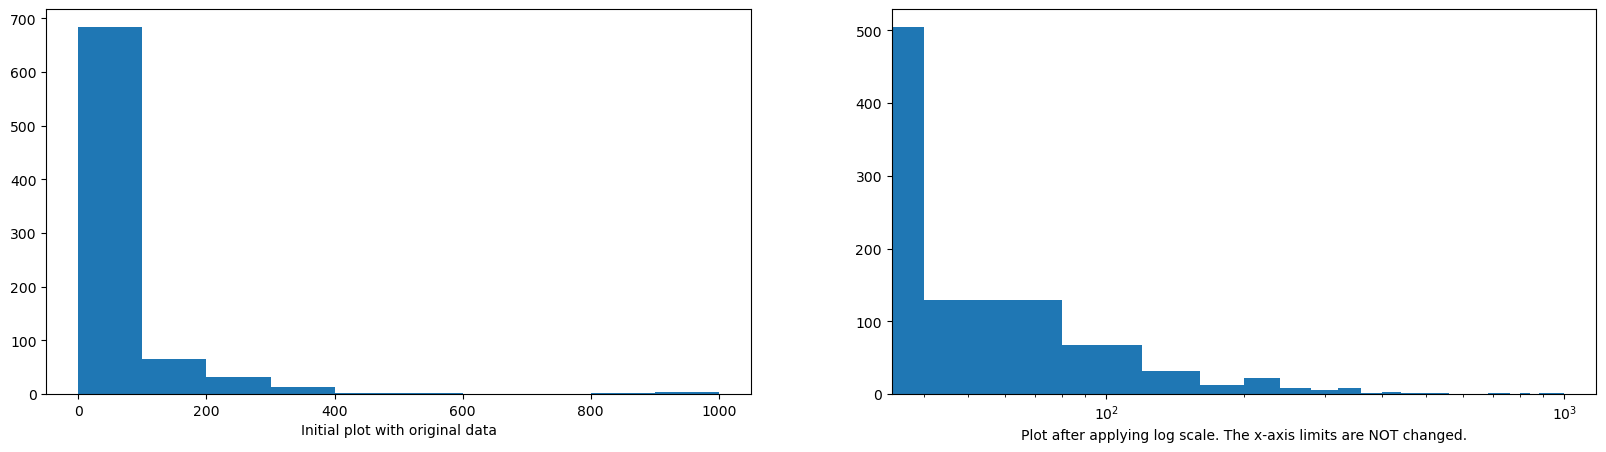

In [25]:
plt.figure(figsize=(20, 5)) # width:20, height:5

# Left: histogram without scaling
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.hist(data=df, x='weight')
# Display a label on the x-axis
plt.xlabel('Initial plot with original data')

# Right: histogram after scaling
plt.subplot(1, 2, 2)
# Get the ticks for bins between [0, maximum weight]
bin_edges = np.arange(0, df['weight'].max()+40, 40)
plt.hist(data=df, x='weight', bins=bin_edges)
# plt.hist(data=df, x='weight', bins=bins_edges, rwidth=0.7) # To see decreasing width of bins on the log scale

# The argument in `xscale()` represents the axis scale type to apply
# The possible alues are 'linear', 'log', 'symlog', 'logit', ...
plt.xscale('log')
plt.xlabel('Plot after applying log scale. The x-axis limits are NOT changed.');

Notice a couple of things.

* The transformation of the data to a $log$ scale did not also transform the bins, which are still linearly spaced as specified by `np.arange()`.
    * We can address this issue by changing the bin sizes so that they are evenly spaced powers of 10 (or another base like 2).
* The default x-axis ticks are sparse and difficult to interpret.
    * We can interpret data in the variable's natural units while the gaps between values are based on the transformed scale.

### Example 2 - Scale the x-axis to log-type and change the axis limit

In [26]:
# Transform the descriptive statistics for the weight variable to log scale
# https://numpy.org/doc/stable/reference/generated/numpy.log10.html
np.log10(df['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

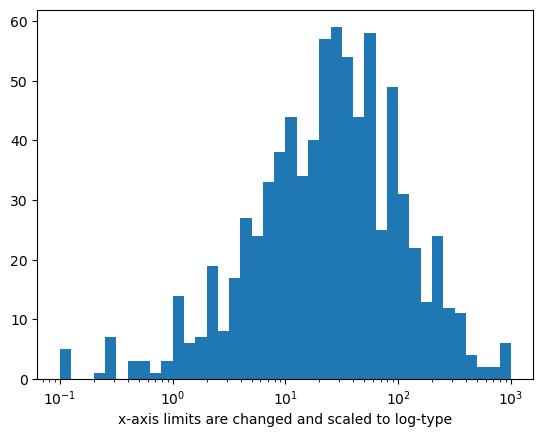

In [27]:
# Axis transformation
# Bin size
base = 10
bin_edges = base ** np.arange(-1, 3+0.1, 0.1) # Change back to the original scale's units
plt.hist(data=df, x='weight', bins=bin_edges);
plt.xscale('log')
plt.xlabel('x-axis limits are changed and scaled to log-type');

### Example 3 - Scale the x-axis to log-type, change the axis limits, and increase the x-ticks

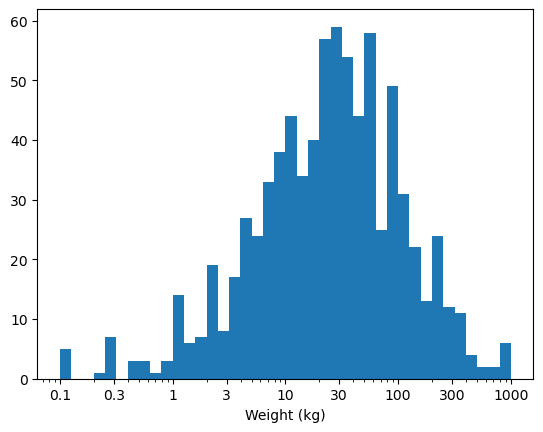

In [47]:
# Get the ticks for bins between [0, maximum weight]
bin_edges = base ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be display along the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=df, x='weight', bins=bin_edges)
plt.xscale('log')

# Apply x-ticks
# This must be done after setting xscale as xscale has its own built-in tick settings
plt.xticks(ticks, labels)
plt.xlabel('Weight (kg)');

Note that we did not change the values taken by the data, only how they are displayed. Setting ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.

### Example 4 - Custom scaling instead of using the built-in log scale

In [30]:
def sqrt_transform(x, inverse=False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

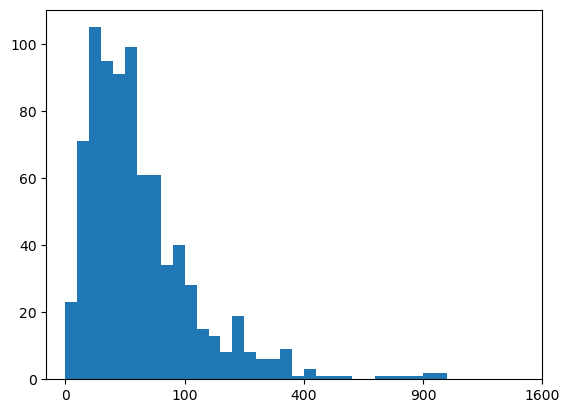

In [42]:
# Bin size
bin_edges = np.arange(0, sqrt_transform(df['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(df['weight'].apply(sqrt_transform), bins=bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_transform(df['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_transform(tick_locs, inverse=True).astype(int));